In [2]:
# Basic
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from joblib import dump, load
import pickle

# GLM
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.families import family
from statsmodels.stats.multitest import multipletests
 
# Modelling
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, StackingRegressor, StackingClassifier
from xgboost import XGBRegressor, XGBClassifier
import xgboost
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from mlxtend.regressor import StackingCVRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# SHAP
import shap

# Mertrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, precision_score, roc_curve, recall_score, precision_recall_curve, precision_recall_fscore_support, roc_auc_score, ConfusionMatrixDisplay, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from scipy.stats import randint
from sklearn.metrics import classification_report

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

# import graphviz
%matplotlib inline

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# glance wd
os.getcwd()

'/home/jhou2/HSV434/LandscapeProject/HSV434-IFNG-mechanism/Code'

In [3]:
os.chdir('/home/jhou2/HSV434/LandscapeProject/HSV434-IFNG-mechanism')

### Preprocessing data for ML: 
### Feature filtering based on significant gene, one-hot/Ordinal coding categorical features, scaling

In [4]:
# Load data and selected gene
with open('Processed/HSV434_Tcell_IFNG_mechanism_ML_OverSampling_data.pickle', 'rb') as file:
    _, X_test, _, y_test, _, exp_matrix_OverSampling_filter = pickle.load(file)
    
selected_genes_final = load('Processed/HSV434_Tcell_IFNG_mechanism_ML_OverSampling_significant_genes')

In [9]:
X_test.head(5)

,MIR1302_2HG,AL627309_1,AL627309_3,AL669831_5,FAM87B,LINC00115,FAM41C,AL645608_7,SAMD11,NOC2L,...,AC213203_1,HSV1_UL36,HSV2_UL18,HSV2_UL23,HSV2_UL26,HSV2_UL47,HSV2_UL49,HSV2_UL50,HSV2_US9,CellType_Level3
Subject5_Lesion_TCTGAGACATGGGACA-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD4 EM 1
Subject11_Lesion_ATTACTCCAGTTCCCT-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD8 EM 1
Subject2_8WPH_TCATTACAGTGGTAAT-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD4 EM 3
Subject1_Entry_GTCACAAAGGGCTTCC-1,0.0,0.0,0.0,0.0,0.0,2.019685,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD8 TRM 1
Subject2_8WPH_GGCTCGATCCATGAAC-1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CD8 ISG


In [13]:
# Select data based on significant_genes
if 'IFNG' not in selected_genes_final['Gene']:
    gene_names = selected_genes_final['Gene'].tolist()
    # assume CellType and Status may play roles here
    columns_to_select = ['CellType_Level3','IFNG_bin']
    columns_to_select.extend(gene_names)
# print(columns_to_select)

In [18]:
# select genes on Training data
exp_matrix_OverSampling_filter_select = exp_matrix_OverSampling_filter[columns_to_select]
exp_matrix_OverSampling_filter_select.shape
# exp_matrix_OverSampling_filter_select.head(5)

(22924, 227)

In [19]:
# Cell Type is nominal variable --> one-hot encoding
dummies_CellType = pd.get_dummies(exp_matrix_OverSampling_filter_select.CellType_Level3)
dummies_CellType = dummies_CellType.astype(int)
# remove Cell Type column
exp_matrix_OverSampling_filter_select = pd.concat([exp_matrix_OverSampling_filter_select.drop('CellType_Level3', axis=1), dummies_CellType], axis='columns')
exp_matrix_OverSampling_filter_select.head(5)

,IFNG_bin,CCL5,CCL4,CD69,CTLA4,JUN,FBXO6,TARDBP,MAF,KLRB1,...,CD4 EM 3,CD4 ISG,CD4 Prolif,CD4 TRM,CD8 CM,CD8 EM 1,CD8 EM 2,CD8 ISG,CD8 TRM 1,CD8 TRM 2
0,0,0.000000,0.000000,2.277548,0.0,1.159451,0.0,0.0,0.000000,2.023473,...,0,0,0,1,0,0,0,0,0,0
1,0,1.818214,0.000000,1.000736,0.0,0.000000,0.0,0.0,1.000736,0.000000,...,0,0,0,1,0,0,0,0,0,0
2,0,3.231091,2.372381,2.746267,0.0,0.000000,0.0,0.0,1.768397,0.000000,...,0,0,0,1,0,0,0,0,0,0
3,0,0.000000,0.000000,1.187996,0.0,0.000000,0.0,0.0,0.000000,2.314712,...,0,0,0,1,0,0,0,0,0,0
4,0,0.000000,0.000000,2.586921,0.0,1.404183,0.0,0.0,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0


In [23]:
# select genes on Testing data
X_test = X_test[columns_to_select]
X_test.shape
X_test.head(5)

,CellType_Level3,CCL5,CCL4,CD69,CTLA4,JUN,FBXO6,TARDBP,MAF,KLRB1,...,MAN2A1,RAB6A,MAN2C1,SH3KBP1,CDC26,CTSB,ZDHHC12,PAXX,BAG1,FAM126B
Subject5_Lesion_TCTGAGACATGGGACA-1,CD4 EM 1,2.859189,0.000000,3.918842,1.869099,2.859189,0.0,0.0,1.319414,0.0,...,0.0,0.0,0.0,1.319414,1.319414,0.0,1.319414,0.0,0.0,0.000000
Subject11_Lesion_ATTACTCCAGTTCCCT-1,CD8 EM 1,3.279988,3.105164,2.253936,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.660620,0.000000,0.0,0.000000,0.0,0.0,0.000000
Subject2_8WPH_TCATTACAGTGGTAAT-1,CD4 EM 3,2.698028,0.000000,2.070049,0.000000,4.432036,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.070049
Subject1_Entry_GTCACAAAGGGCTTCC-1,CD8 TRM 1,4.659423,0.000000,3.025672,0.000000,3.301148,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,2.019685,0.0,0.000000,0.0,0.0,0.000000
Subject2_8WPH_GGCTCGATCCATGAAC-1,CD8 ISG,3.896928,4.849360,2.569763,0.000000,3.615991,0.0,0.0,1.950381,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [24]:
# Cell Type is nominal variable --> one-hot encoding
dummies_CellType = pd.get_dummies(X_test.CellType_Level3)
dummies_CellType = dummies_CellType.astype(int)
# remove Cell Type column
X_test = pd.concat([X_test.drop('CellType_Level3', axis=1), dummies_CellType], axis='columns')
X_test.head(2)

,CCL5,CCL4,CD69,CTLA4,JUN,FBXO6,TARDBP,MAF,KLRB1,TXLNG,...,CD4 EM 3,CD4 ISG,CD4 Prolif,CD4 TRM,CD8 CM,CD8 EM 1,CD8 EM 2,CD8 ISG,CD8 TRM 1,CD8 TRM 2
Subject5_Lesion_TCTGAGACATGGGACA-1,2.859189,0.000000,3.918842,1.869099,2.859189,0.0,0.0,1.319414,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
Subject11_Lesion_ATTACTCCAGTTCCCT-1,3.279988,3.105164,2.253936,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


### Spliting data to Train and Test data And scaling 

In [25]:
X_train_oversample = exp_matrix_OverSampling_filter_select.drop(['IFNG_bin'], axis = 1)
X_train_oversample.head(2)

,CCL5,CCL4,CD69,CTLA4,JUN,FBXO6,TARDBP,MAF,KLRB1,TXLNG,...,CD4 EM 3,CD4 ISG,CD4 Prolif,CD4 TRM,CD8 CM,CD8 EM 1,CD8 EM 2,CD8 ISG,CD8 TRM 1,CD8 TRM 2
0,0.000000,0.0,2.277548,0.0,1.159451,0.0,0.0,0.000000,2.023473,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1.818214,0.0,1.000736,0.0,0.000000,0.0,0.0,1.000736,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
y_train_oversample = exp_matrix_OverSampling_filter_select['IFNG_bin']
y_train_oversample.size

22924

In [27]:
print(f"X_train_oversample data shape:{X_train_oversample.shape}\n",
      f"y_train_oversample data shape:{y_train_oversample.shape}\n",
      f"X_test data shape:{X_test.shape}\n",
      f"y_test data shape:{y_test.shape}\n")

X_train_oversample data shape:(22924, 239)
 y_train_oversample data shape:(22924,)
 X_test data shape:(5743, 239)
 y_test data shape:(5743,)



In [28]:
# Apply scaling 
# Scaling: Fit only on the training set
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

X_train_oversample_scaled = X_train_oversample.copy()

columns_to_scale = X_train_oversample_scaled.columns.difference(['CD4 Act', 'CD4 CM', 'CD4 EM 1', 'CD4 EM 2', 'CD4 EM 3',
                                                                  'CD4 ISG', 'CD4 Prolif', 'CD4 TRM', 'CD8 CM', 'CD8 EM 1', 'CD8 EM 2',
                                                                  'CD8 ISG', 'CD8 TRM 1', 'CD8 TRM 2'])
print(columns_to_scale)

X_train_oversample_scaled[columns_to_scale] = scaler.fit_transform(X_train_oversample_scaled[columns_to_scale])
X_train_oversample_scaled.head(2)

Index(['A1BG_AS1', 'AC010894_3', 'AC136475_3', 'AC245297_3', 'ACADVL', 'ACOT7',
       'ACTG1', 'ADCY7', 'ALDOA', 'AP3B1',
       ...
       'UNC119', 'UTP6', 'ZCCHC17', 'ZDHHC12', 'ZDHHC21', 'ZFYVE19', 'ZFYVE28',
       'ZNF138', 'ZNF33A', 'ZNF529'],
      dtype='object', length=225)


,CCL5,CCL4,CD69,CTLA4,JUN,FBXO6,TARDBP,MAF,KLRB1,TXLNG,...,CD4 EM 3,CD4 ISG,CD4 Prolif,CD4 TRM,CD8 CM,CD8 EM 1,CD8 EM 2,CD8 ISG,CD8 TRM 1,CD8 TRM 2
0,-1.334829,-0.457526,0.180816,-0.55724,-0.239252,-0.353146,-0.277384,-0.540171,1.223443,-0.501997,...,0,0,0,1,0,0,0,0,0,0
1,-0.229018,-0.457526,-0.826918,-0.55724,-1.166508,-0.353146,-0.277384,1.041793,-0.682587,-0.501997,...,0,0,0,1,0,0,0,0,0,0


In [29]:
# Apply the transformation to validation and test sets
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_test_scaled.head(2)

,CCL5,CCL4,CD69,CTLA4,JUN,FBXO6,TARDBP,MAF,KLRB1,TXLNG,...,CD4 EM 3,CD4 ISG,CD4 Prolif,CD4 TRM,CD8 CM,CD8 EM 1,CD8 EM 2,CD8 ISG,CD8 TRM 1,CD8 TRM 2
Subject5_Lesion_TCTGAGACATGGGACA-1,0.404087,-0.457526,1.47622,1.930069,1.120091,-0.353146,-0.277384,1.545561,-0.682587,-0.501997,...,0,0,0,0,0,0,0,0,0,0
Subject11_Lesion_ATTACTCCAGTTCCCT-1,0.660011,2.055273,0.16218,-0.557240,-1.166508,-0.353146,-0.277384,-0.540171,-0.682587,-0.501997,...,0,0,0,0,0,1,0,0,0,0


In [30]:
# saving split data
with open('Processed/HSV434_Tcell_IFNG_mechanism_ML_OverSampling_Final_data.pickle', 'wb') as file:
    pickle.dump((X_train_oversample_scaled, X_test_scaled, y_train_oversample, y_test), file)

## Classification models

In [31]:
with open('Processed/HSV434_Tcell_IFNG_mechanism_ML_OverSampling_Final_data.pickle', 'rb') as file:
    X_train_oversample_scaled, X_test_scaled, y_train_oversample, y_test = pickle.load(file)

## (1) Random Forest

In [32]:
# BayesianCV - search best parameters
n_iter = 100

rf_class_params = {'n_estimators': Integer(100, 1000),
                   'max_depth':Integer(1, 100),
                   'min_samples_split':Integer(2, 30)}

rf_class_grid = BayesSearchCV(estimator=RandomForestClassifier(),
                              search_spaces=rf_class_params,
                              n_iter=n_iter,
                              cv=5,
                              n_jobs=-1,
                              scoring='roc_auc',
                              random_state=123)

rf_class_grid.fit(X_train_oversample_scaled, y_train_oversample)

print("Best Random Forest Classifier Parameters:", rf_class_grid.best_params_)

Best Random Forest Classifier Parameters: OrderedDict([('max_depth', 42), ('min_samples_split', 2), ('n_estimators', 982)])


In [33]:
# Finalize the model by applying the best parameters
RF_class_best = RandomForestClassifier(max_depth=rf_class_grid.best_params_['max_depth'], 
                                       min_samples_split=rf_class_grid.best_params_['min_samples_split'],
                                       n_estimators=rf_class_grid.best_params_['n_estimators'])
RF_class_best.fit(X_train_oversample_scaled, y_train_oversample)

# Prediction on testing data
y_pred = RF_class_best.predict(X_test_scaled)

# Get predicted probabilities for ROC AUC
y_pred_proba = RF_class_best.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class (1)

# Evaluation
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.4f}\n"
      f"Recall: {recall:.4f}\n"
      f"F1: {f1:.4f}\n"
      f"ROC_AUC: {roc_auc:.4f}")

Precision: 0.3980
Recall: 0.0470
F1: 0.0841
ROC_AUC: 0.7544


In [36]:
# The top-left: true negatives (TN).
# The top-right: false positives (FP).
# The bottom-left: false negatives (FN).
# The bottom-right: true positives (TP).
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4854   59]
 [ 791   39]]


## (2) XGBoost

In [37]:
# Bayesian CV - search best parameters
n_iter = 100

xgb_class_params = {'n_estimators': Integer(100, 1000),
                    'max_depth':Integer(1, 100),
                    'learning_rate':Real(0.0001, 0.1, prior='log-uniform')}

xgb_class_grid = BayesSearchCV(estimator = XGBClassifier(),
                               search_spaces = xgb_class_params,
                               n_iter = n_iter,
                               cv = 5,
                               n_jobs = -1,
                               scoring = 'roc_auc',
                               random_state = 123)

xgb_class_grid.fit(X_train_oversample_scaled, y_train_oversample)

print("Best XGB Classifier Parameters:", xgb_class_grid.best_params_)

Best XGB Classifier Parameters: OrderedDict([('learning_rate', 0.058925762950716956), ('max_depth', 80), ('n_estimators', 718)])


In [38]:
# Finalize the model by appling the best parameters
xgb_class_best = XGBClassifier(max_depth = xgb_class_grid.best_params_['max_depth'],
                               learning_rate = xgb_class_grid.best_params_['learning_rate'],
                               n_estimators = xgb_class_grid.best_params_['n_estimators'])
xgb_class_best.fit(X_train_oversample_scaled, y_train_oversample)

# prediction on testing data
y_pred = xgb_class_best.predict(X_test_scaled)

# Get predicted probabilities for ROC AUC
y_pred_proba = xgb_class_best.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class (1)

# Evaluation
precision, recall, f, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.4f}\n"
      f"Recall: {recall:.4f}\n"
      f"F1: {f1:.4f}\n"
      f"ROC_AUC: {roc_auc:.4f}")

Precision: 0.5385
Recall: 0.1687
F1: 0.0841
ROC_AUC: 0.7738


In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4793  120]
 [ 690  140]]


### Look at data PCA after oversampling? 

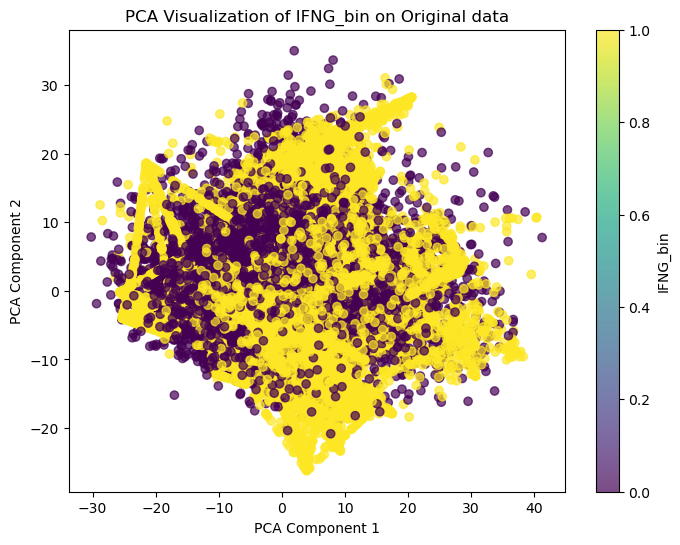

In [42]:
# Separate features and target
X = exp_matrix_OverSampling_filter.drop(['CellType_Level3', 'IFNG_bin'], axis = 1)
y = exp_matrix_OverSampling_filter['IFNG_bin']

# Scale the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_X)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='IFNG_bin')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of IFNG_bin on Original data')
plt.show()

### what if we select features first, then apply SMOTE, let's ovesampling on more specific features??

In [45]:
exp_matrix_Original = load('Processed/HSV434_Tcell_IFNG_mechanism_exp_matrix')

In [46]:
selected_significant_genes = load('Processed/HSV434_Tcell_IFNG_mechanism_ML_Original_significant_genes')

In [47]:
# Select data based on significant_genes
if 'IFNG' not in selected_significant_genes['Gene']:
    gene_names = selected_significant_genes['Gene'].tolist()
    # assume CellType and Status may play roles here
    columns_to_select = ['CellType_Level3', 'Status', 'IFNG_bin']
    columns_to_select.extend(gene_names)

exp_matrix_Original_select = exp_matrix_Original[columns_to_select]
exp_matrix_Original_select.head(3)

,CellType_Level3,Status,IFNG_bin,CCL5,CCL4,CD69,TNF,IL7R,IL12RB2,HOPX,...,AKAP2,PTGER4,FXYD5,SLC9A3R1,CD160,SLAMF7,CSF1,EGR1,EOMES,TAGAP
Subject1_8WPH_AACTTTCCACTTAAGC-1,CD4 EM 2,Post,0,0.000000,0.0,0.000000,1.547185,3.637119,0.000000,2.127809,...,0.0,0.000000,3.291664,0.0,0.0,0.0,0.0,0.0,0.0,1.547185
Subject1_8WPH_AACTTTCTCAGCGATT-1,CD4 EM 3,Post,0,0.000000,0.0,0.000000,2.148939,0.000000,0.000000,0.000000,...,0.0,2.782014,2.148939,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Subject1_8WPH_ACAGCCGCATATACGC-1,CD4 TRM,Post,0,3.024739,0.0,3.693302,0.000000,0.000000,1.774471,1.774471,...,0.0,3.238121,1.774471,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [49]:
# Split the data into training and testing sets first
X = exp_matrix_Original_select.drop(columns=['IFNG_bin', 'Status'])  # Features
y = exp_matrix_Original_select['IFNG_bin']  # Target variable
# Perform a stratified split to maintain the class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [53]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [52]:
# Initialize an empty list to store the resampled DataFrames
exp_matrix_OverSampling = []

# Loop over each unique CellType_Level3
for cluster in X_train['CellType_Level3'].unique():
    # Subset the data for the current cell type
    cluster_data = X_train[X_train['CellType_Level3'] == cluster]
    y_cluster = y_train[cluster_data.index]  # Get corresponding target values for this subset

    # Check class distribution for IFNG+ (1) and IFNG- (0)
    class_counts = y_cluster.value_counts()
    min_class_count = class_counts.min() if len(class_counts) == 2 else 0

    if min_class_count < 6:
        print(f"Skipping {cluster} due to insufficient samples in one or more classes.")
        continue
    
    # Apply SMOTE only to the current cluster's data (balancing IFNG+ and IFNG- cells)
    smote = BorderlineSMOTE(random_state=42)
    X_cluster_resampled, y_cluster_resampled = smote.fit_resample(
        cluster_data.drop(columns=['CellType_Level3']), y_cluster
    )
    
    # Reattach the CellType_Level3 column for future use
    X_cluster_resampled['CellType_Level3'] = cluster
    
    # Concatenate the resampled data for this cluster
    resampled_cluster_data = pd.concat([X_cluster_resampled, 
                                        pd.Series(y_cluster_resampled, name='IFNG_bin')], axis=1)
    
    # Append the resampled cluster data to the list
    exp_matrix_OverSampling.append(resampled_cluster_data)

In [54]:
exp_matrix_OverSampling = pd.concat(exp_matrix_OverSampling, ignore_index=True)

In [55]:
exp_matrix_OverSampling.head(5)

,CCL5,CCL4,CD69,TNF,IL7R,IL12RB2,HOPX,JUN,GZMA,TNFSF9,...,FXYD5,SLC9A3R1,CD160,SLAMF7,CSF1,EGR1,EOMES,TAGAP,CellType_Level3,IFNG_bin
0,0.000000,0.000000,2.277548,0.00000,1.159451,0.0,1.159451,1.159451,2.023473,1.682013,...,3.221673,1.159451,0.0,0.000000,1.159451,0.000000,0.0,2.023473,CD4 TRM,0
1,1.818214,0.000000,1.000736,2.26191,2.426721,0.0,2.802302,0.000000,3.074700,0.000000,...,3.151182,1.000736,0.0,0.000000,1.490781,0.000000,0.0,0.000000,CD4 TRM,0
2,3.231091,2.372381,2.746267,0.00000,3.017777,0.0,2.372381,0.000000,1.768397,2.746267,...,2.372381,2.372381,0.0,0.000000,0.000000,0.000000,0.0,0.000000,CD4 TRM,0
3,0.000000,0.000000,1.187996,0.00000,2.517899,0.0,1.187996,0.000000,2.517899,0.000000,...,3.345192,1.187996,0.0,0.000000,1.187996,0.000000,0.0,2.059431,CD4 TRM,0
4,0.000000,0.000000,2.586921,0.00000,3.241716,0.0,1.966328,1.404183,1.966328,0.000000,...,3.113754,0.000000,0.0,1.404183,0.000000,1.404183,0.0,1.404183,CD4 TRM,0


In [58]:
# Cell Type is nominal variable --> one-hot encoding
dummies_CellType = pd.get_dummies(exp_matrix_OverSampling.CellType_Level3)
dummies_CellType = dummies_CellType.astype(int)
# remove Cell Type column
exp_matrix_OverSampling = pd.concat([exp_matrix_OverSampling.drop('CellType_Level3', axis=1), dummies_CellType], axis='columns')
exp_matrix_OverSampling.head(5)

,CCL5,CCL4,CD69,TNF,IL7R,IL12RB2,HOPX,JUN,GZMA,TNFSF9,...,CD4 EM 3,CD4 ISG,CD4 Prolif,CD4 TRM,CD8 CM,CD8 EM 1,CD8 EM 2,CD8 ISG,CD8 TRM 1,CD8 TRM 2
0,0.000000,0.000000,2.277548,0.00000,1.159451,0.0,1.159451,1.159451,2.023473,1.682013,...,0,0,0,1,0,0,0,0,0,0
1,1.818214,0.000000,1.000736,2.26191,2.426721,0.0,2.802302,0.000000,3.074700,0.000000,...,0,0,0,1,0,0,0,0,0,0
2,3.231091,2.372381,2.746267,0.00000,3.017777,0.0,2.372381,0.000000,1.768397,2.746267,...,0,0,0,1,0,0,0,0,0,0
3,0.000000,0.000000,1.187996,0.00000,2.517899,0.0,1.187996,0.000000,2.517899,0.000000,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,0.000000,2.586921,0.00000,3.241716,0.0,1.966328,1.404183,1.966328,0.000000,...,0,0,0,1,0,0,0,0,0,0


In [62]:
# Cell Type is nominal variable --> one-hot encoding
dummies_CellType = pd.get_dummies(X_test.CellType_Level3)
dummies_CellType = dummies_CellType.astype(int)
# remove Cell Type column
X_test = pd.concat([X_test.drop('CellType_Level3', axis=1), dummies_CellType], axis='columns')
X_test.head(2)

,CCL5,CCL4,CD69,TNF,IL7R,IL12RB2,HOPX,JUN,GZMA,TNFSF9,...,CD4 EM 3,CD4 ISG,CD4 Prolif,CD4 TRM,CD8 CM,CD8 EM 1,CD8 EM 2,CD8 ISG,CD8 TRM 1,CD8 TRM 2
Subject5_Lesion_TCTGAGACATGGGACA-1,2.859189,0.000000,3.918842,0.0,2.481978,2.221775,1.319414,2.859189,2.221775,0.0,...,0,0,0,0,0,0,0,0,0,0
Subject11_Lesion_ATTACTCCAGTTCCCT-1,3.279988,3.105164,2.253936,0.0,1.660620,0.000000,0.000000,0.000000,2.623779,0.0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
X_test

,CellType_Level3,CCL5,CCL4,CD69,TNF,IL7R,IL12RB2,HOPX,JUN,GZMA,...,AKAP2,PTGER4,FXYD5,SLC9A3R1,CD160,SLAMF7,CSF1,EGR1,EOMES,TAGAP
Subject5_Lesion_TCTGAGACATGGGACA-1,CD4 EM 1,2.859189,0.000000,3.918842,0.000000,2.481978,2.221775,1.319414,2.859189,2.221775,...,0.0,1.869099,3.132438,0.000000,0.000000,0.0,0.0,2.859189,0.000000,2.481978
Subject11_Lesion_ATTACTCCAGTTCCCT-1,CD8 EM 1,3.279988,3.105164,2.253936,0.000000,1.660620,0.000000,0.000000,0.000000,2.623779,...,0.0,2.253936,3.279988,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.660620
Subject2_8WPH_TCATTACAGTGGTAAT-1,CD4 EM 3,2.698028,0.000000,2.070049,3.356926,3.750709,0.000000,0.000000,4.432036,0.000000,...,0.0,2.070049,3.750709,2.070049,0.000000,0.0,0.0,0.000000,0.000000,2.698028
Subject1_Entry_GTCACAAAGGGCTTCC-1,CD8 TRM 1,4.659423,0.000000,3.025672,2.644180,0.000000,0.000000,3.516896,3.301148,2.644180,...,0.0,3.025672,0.000000,0.000000,2.019685,0.0,0.0,0.000000,0.000000,2.019685
Subject2_8WPH_GGCTCGATCCATGAAC-1,CD8 ISG,3.896928,4.849360,2.569763,0.000000,0.000000,0.000000,0.000000,3.615991,3.223881,...,0.0,1.950381,0.000000,1.950381,1.950381,0.0,0.0,0.000000,1.950381,1.950381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Subject7_8WPH_CTGGTCTAGCTGTCTA-1,CD4 TRM,3.739464,1.554798,0.000000,0.000000,2.136325,2.136325,2.501632,0.000000,3.429883,...,0.0,0.000000,2.136325,1.554798,0.000000,0.0,0.0,0.000000,0.000000,2.136325
Subject1_Entry_GCCTCTATCCAAGTAC-1,CD8 TRM 1,4.558446,5.363538,2.408569,2.673509,3.055702,0.000000,2.673509,0.000000,2.408569,...,0.0,2.408569,2.408569,1.475376,0.000000,0.0,0.0,0.000000,0.000000,2.673509
Subject14_Lesion_GAGTCCGCATCGTCGG-1,CD8 CM,3.311700,0.000000,1.370383,0.000000,3.590227,0.000000,1.370383,1.370383,2.545330,...,0.0,1.927705,2.283461,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.370383
Subject2_8WPH_CAGCATAAGGGCTTGA-1,CD8 EM 1,5.156426,2.772823,3.434229,0.000000,0.000000,0.000000,0.000000,0.000000,2.140287,...,0.0,0.000000,3.157240,2.140287,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [63]:
X_train_oversample = exp_matrix_OverSampling.drop(['IFNG_bin'], axis = 1)
X_train_oversample.head(2)

,CCL5,CCL4,CD69,TNF,IL7R,IL12RB2,HOPX,JUN,GZMA,TNFSF9,...,CD4 EM 3,CD4 ISG,CD4 Prolif,CD4 TRM,CD8 CM,CD8 EM 1,CD8 EM 2,CD8 ISG,CD8 TRM 1,CD8 TRM 2
0,0.000000,0.0,2.277548,0.00000,1.159451,0.0,1.159451,1.159451,2.023473,1.682013,...,0,0,0,1,0,0,0,0,0,0
1,1.818214,0.0,1.000736,2.26191,2.426721,0.0,2.802302,0.000000,3.074700,0.000000,...,0,0,0,1,0,0,0,0,0,0


In [64]:
y_train_oversample = exp_matrix_OverSampling['IFNG_bin']
y_train_oversample.size

22924

In [65]:
print(f"X_train_oversample data shape:{X_train_oversample.shape}\n",
      f"y_train_oversample data shape:{y_train_oversample.shape}\n",
      f"X_test data shape:{X_test.shape}\n",
      f"y_test data shape:{y_test.shape}\n")

X_train_oversample data shape:(22924, 115)
 y_train_oversample data shape:(22924,)
 X_test data shape:(5743, 115)
 y_test data shape:(5743,)



In [66]:
# Apply scaling 
# Scaling: Fit only on the training set
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

X_train_oversample_scaled = X_train_oversample.copy()

columns_to_scale = X_train_oversample_scaled.columns.difference(['CD4 Act', 'CD4 CM', 'CD4 EM 1', 'CD4 EM 2', 'CD4 EM 3',
                                                                  'CD4 ISG', 'CD4 Prolif', 'CD4 TRM', 'CD8 CM', 'CD8 EM 1', 'CD8 EM 2',
                                                                  'CD8 ISG', 'CD8 TRM 1', 'CD8 TRM 2'])
print(columns_to_scale)

X_train_oversample_scaled[columns_to_scale] = scaler.fit_transform(X_train_oversample_scaled[columns_to_scale])
X_train_oversample_scaled.head(2)

Index(['AC104078_2', 'ACOT7', 'ACTG1', 'ADGRG1', 'AKAP2', 'AL158071_4',
       'ALDOA', 'APOBEC3C', 'ATP8B4', 'BHLHE40',
       ...
       'SLC9A3R1', 'STOM', 'SVIL', 'TAGAP', 'TAP1', 'TNF', 'TNFSF9', 'TPM3',
       'TSC22D4', 'XCL1'],
      dtype='object', length=101)


,CCL5,CCL4,CD69,TNF,IL7R,IL12RB2,HOPX,JUN,GZMA,TNFSF9,...,CD4 EM 3,CD4 ISG,CD4 Prolif,CD4 TRM,CD8 CM,CD8 EM 1,CD8 EM 2,CD8 ISG,CD8 TRM 1,CD8 TRM 2
0,-1.338472,-0.452739,0.179842,-0.461985,-0.687951,-0.432516,0.290144,-0.224010,0.702694,1.865175,...,0,0,0,1,0,0,0,0,0,0
1,-0.246590,-0.452739,-0.817661,2.321754,0.315353,-0.432516,1.827436,-1.127682,1.574766,-0.445168,...,0,0,0,1,0,0,0,0,0,0


In [67]:
# Apply the transformation to validation and test sets
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])
X_test_scaled.head(2)

,CCL5,CCL4,CD69,TNF,IL7R,IL12RB2,HOPX,JUN,GZMA,TNFSF9,...,CD4 EM 3,CD4 ISG,CD4 Prolif,CD4 TRM,CD8 CM,CD8 EM 1,CD8 EM 2,CD8 ISG,CD8 TRM 1,CD8 TRM 2
Subject5_Lesion_TCTGAGACATGGGACA-1,0.37854,-0.452739,1.462095,-0.461985,0.359101,3.225486,0.439828,1.100758,0.867200,-0.445168,...,0,0,0,0,0,0,0,0,0,0
Subject11_Lesion_ATTACTCCAGTTCCCT-1,0.63124,2.115127,0.161395,-0.461985,-0.291172,-0.432516,-0.794810,-1.127682,1.200693,-0.445168,...,0,0,0,0,0,1,0,0,0,0


In [68]:
# BayesianCV - search best parameters
n_iter = 100

rf_class_params = {'n_estimators': Integer(100, 1000),
                   'max_depth':Integer(1, 100),
                   'min_samples_split':Integer(2, 30)}

rf_class_grid = BayesSearchCV(estimator=RandomForestClassifier(),
                              search_spaces=rf_class_params,
                              n_iter=n_iter,
                              cv=5,
                              n_jobs=-1,
                              scoring='roc_auc',
                              random_state=123)

rf_class_grid.fit(X_train_oversample_scaled, y_train_oversample)

print("Best Random Forest Classifier Parameters:", rf_class_grid.best_params_)

Best Random Forest Classifier Parameters: OrderedDict([('max_depth', 75), ('min_samples_split', 2), ('n_estimators', 1000)])


In [69]:
# Finalize the model by applying the best parameters
RF_class_best = RandomForestClassifier(max_depth=rf_class_grid.best_params_['max_depth'], 
                                       min_samples_split=rf_class_grid.best_params_['min_samples_split'],
                                       n_estimators=rf_class_grid.best_params_['n_estimators'])
RF_class_best.fit(X_train_oversample_scaled, y_train_oversample)

# Prediction on testing data
y_pred = RF_class_best.predict(X_test_scaled)

# Get predicted probabilities for ROC AUC
y_pred_proba = RF_class_best.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class (1)

# Evaluation
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.4f}\n"
      f"Recall: {recall:.4f}\n"
      f"F1: {f1:.4f}\n"
      f"ROC_AUC: {roc_auc:.4f}")

Precision: 0.4767
Recall: 0.1976
F1: 0.2794
ROC_AUC: 0.7957


In [70]:
# Bayesian CV - search best parameters
n_iter = 100

xgb_class_params = {'n_estimators': Integer(100, 1000),
                    'max_depth':Integer(1, 100),
                    'learning_rate':Real(0.0001, 0.1, prior='log-uniform')}

xgb_class_grid = BayesSearchCV(estimator = XGBClassifier(),
                               search_spaces = xgb_class_params,
                               n_iter = n_iter,
                               cv = 5,
                               n_jobs = -1,
                               scoring = 'roc_auc',
                               random_state = 123)

xgb_class_grid.fit(X_train_oversample_scaled, y_train_oversample)

print("Best XGB Classifier Parameters:", xgb_class_grid.best_params_)

Best XGB Classifier Parameters: OrderedDict([('learning_rate', 0.02295189094892074), ('max_depth', 14), ('n_estimators', 727)])


In [71]:
# Finalize the model by appling the best parameters
xgb_class_best = XGBClassifier(max_depth = xgb_class_grid.best_params_['max_depth'],
                               learning_rate = xgb_class_grid.best_params_['learning_rate'],
                               n_estimators = xgb_class_grid.best_params_['n_estimators'])
xgb_class_best.fit(X_train_oversample_scaled, y_train_oversample)

# prediction on testing data
y_pred = xgb_class_best.predict(X_test_scaled)

# Get predicted probabilities for ROC AUC
y_pred_proba = xgb_class_best.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class (1)

# Evaluation
precision, recall, f, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.4f}\n"
      f"Recall: {recall:.4f}\n"
      f"F1: {f1:.4f}\n"
      f"ROC_AUC: {roc_auc:.4f}")

Precision: 0.5217
Recall: 0.2313
F1: 0.2794
ROC_AUC: 0.8032


In [ ]:
### some improvements on recall, but not ideal still. 